In [1]:
import os 
import cv2
import tifffile as tiff
import random
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_img_dir = "../data/patches_256/patch_img/"
train_mask_dir = "../data/patches_256/patch_mask/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

# Create output directories for filtered patches
# Create output directories for filtered patches
output_image_dir = '../data/patches_256_useful/patch_img/'
output_mask_dir = '../data/patches_256_useful/patch_mask/'
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)

23034


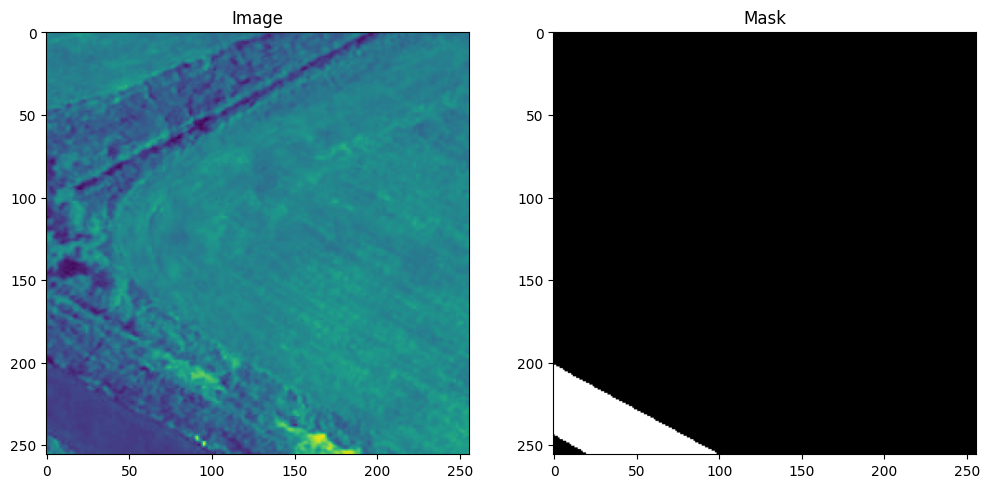

In [3]:
img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread((train_img_dir+img_list[img_num]), 0)
# img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)
mask_for_plot =tiff.imread(train_mask_dir+msk_list[img_num])
print(img_num)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

In [4]:
###########################################################################

#Now, let us copy images and masks with real information to a new folder.
# real information = if mask has decent amount of labels other than 0. 
image_info = []
useless=0  #Useless image counter
for img in range(len(img_list)):   #Using t1_list as all lists are of same size
    img_name=img_list[img]
    mask_name = msk_list[img]
    # print("Now preparing image and masks number: ", img, img_name, mask_name)
      
    temp_image=cv2.imread(train_img_dir+img_list[img], 1)
   
    temp_mask=tiff.imread(train_mask_dir+msk_list[img])
    #temp_mask=temp_mask.astype(np.uint8)
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.05:  #At least 5% useful area with labels that are not 0
        # print(f"Saving no {img}:  {img_list[img]} , {msk_list[img]}")
        image_info.append({'Image Name': img_name, 'Mask Name': mask_name, 'Status': 'Useful'})
        cv2.imwrite(output_image_dir+img_name, temp_image)
        tiff.imwrite(output_mask_dir+mask_name, temp_mask)
        
    else:
        # print(f"Useless no {img}:  {img_list[img]} , {msk_list[img]}")
        image_info.append({'Image Name': img_name, 'Mask Name': mask_name, 'Status': 'Useless'})
        useless +=1

print("Total useful images are: ", len(img_list)-useless)  #20,075
print("Total useless images are: ", useless) #21,571

Total useful images are:  18667
Total useless images are:  17907


In [5]:
import pandas as pd
# Create a DataFrame from the image_info list
df = pd.DataFrame(image_info)
original_string = output_image_dir
filename = original_string.split('/')[2]
print(f'Filename : {filename}')
# Define the path for the CSV file
csv_file_path = f"../data/{filename}.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"Print statements have been saved to {csv_file_path}")

Filename : patches_256_useful
Print statements have been saved to ../data/patches_256_useful.csv
